<table class="table table-bordered">
    <tr>
        <th style="width:200px;">
            <img src='https://bcgriseacademy.com/hs-fs/hubfs/RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png?width=3522&height=1986&name=RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png' style="background-color:black; width: 100%; height: 100%;">
        </th>
        <th style="text-align:center;">
            <h1>IBF TFIP</h1>
            <h2>Pandas II - Data Visualization</h2>
        </th>
    </tr>
</table>

# Learning Objectives
#### After completing this lesson, you should be able to:

1. LO1 : Understand Data Visualization with Pandas
2. LO2 : Understand Data Exploration using data visualization packages
3. LO3 : Apply Pandas libraries to create visualizations


# Table of Contents <a id='tc'></a>

1. [Plotting Visualization with Pandas](#p1)
2. [[Optional] Plotting Visualization with Plotly](#p2)
3. [Data Exploration](#p3)
4. [Hands-On Practice Exercise](#p4)
4. [Kahoot Quiz](#)

# 1. Plotting Visualization with Pandas <a id='p1' />

matplotlib is a relatively *low-level* plotting package, relative to others. It makes very few assumptions about what constitutes good layout (by design), but has a lot of flexibility to allow the user to completely customize the look of the output.

On the other hand, Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np

In [ ]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

Notice that by default a line plot is drawn, and light background is included. These decisions were made on your behalf by pandas.

However, all of this can be changed:

In [ ]:
normals.cumsum().plot(grid=True) #The cumsum() method is a pandas function that calculates the cumulative sum of the elements in a series or dataframe. 

## 1.1 Plotting on DataFrame

In [ ]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for `plot`:

In [ ]:
variables.cumsum(0).plot(subplots=True, grid=True)

Or, we may want to have some series displayed on the secondary y-axis, which can allow for greater detail and less empty space:

In [ ]:
variables.cumsum(0).plot(secondary_y='normal', grid=True)

If we would like a little more control, we can use matplotlib's `subplots` function directly, and manually assign plots to its axes:

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

## 1.2 Bar plots 

Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the `plot` method with a `kind='bar'` argument.

For this series of examples, let's load up the Titanic dataset:

In [ ]:
titanic = pd.read_excel("./data/titanic.xls", "titanic")
titanic.head()

### 1.2.1 Vertical Bar Chart

In [ ]:
titanic.groupby('pclass').survived.sum().plot.bar()

### 1.2.2 Horizontal Bar Chart

In [ ]:
titanic.groupby(['sex','pclass']).survived.sum().plot.barh()

### 1.2.3 Stacked Bar Chart

In [ ]:
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts.plot.bar(stacked=True, color=['black','gold'], grid=True)

### 1.2.4 Stacked Bar Chart (%)

Another way of comparing the groups is to look at the survival *rate*, by adjusting for the number of people in each group.

In [ ]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot.barh(stacked=True, color=['black','gold'])

## 1.3 Histograms

Frequently it is useful to look at the *distribution* of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

For example, we might want to see how the fares were distributed aboard the titanic:

In [ ]:
titanic.fare.hist(grid=False)

The `hist` method puts the continuous fare values into **bins**, trying to make a sensible decision about how many bins to use (or equivalently, how wide the bins are). We can override the default value (10):

In [ ]:
titanic.fare.hist(bins=30)

A **density plot** is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an *estimate* of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the `plot` method with `kind='kde'`, where `kde` stands for **kernel density estimate**.

In [ ]:
titanic.fare.dropna().plot.kde(xlim=(0,600))

Often, histograms and density plots are shown together:

In [ ]:
titanic.fare.hist(bins=30, density=True, color='lightseagreen')
titanic.fare.dropna().plot.kde(xlim=(0,600), style='r--')

Here, we had to normalize the histogram (`density=True`), since the kernel density is normalized by definition (it is a probability distribution).

- `density=True` represents the frequency distribution
- `density=False` represents the probability density distribution

We will explore kernel density estimates more in the next section.

## 1.4 Boxplots

A different way of visualizing the distribution of data is the boxplot, which is a display of common quantiles; these are typically the quartiles and the lower and upper 5 percent values.

In [ ]:
titanic.boxplot(column='fare', by='pclass', grid=False)

You can think of the box plot as viewing the distribution from above. The blue crosses are "outlier" points that occur outside the extreme quantiles.

One way to add additional information to a boxplot is to overlay the actual data; this is generally most suitable with small- or moderate-sized data series.

In [ ]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y.values, 'r.', alpha=0.2)

When data are dense, a couple of tricks used above help the visualization:

1. reducing the alpha level to make the points partially transparent
2. adding random "jitter" along the x-axis to avoid overstriking

## 1.5 Scatterplots <a id='p3.4' />

To look at how Pandas does scatterplots, let's look at a small dataset in wine chemistry.

In [ ]:
wine = pd.read_table("./data/wine.data", sep=',')

attributes = ['Grape',
              'Alcohol',
              'Malic acid',
              'Ash',
              'Alcalinity of ash',
              'Magnesium',
              'Total phenols',
              'Flavanoids',
              'Nonflavanoid phenols',
              'Proanthocyanins',
              'Color intensity',
              'Hue',
              'OD280/OD315 of diluted wines',
              'Proline']

wine.columns = attributes

Scatterplots are useful for data exploration, where we seek to uncover relationships among variables.

In [ ]:
wine.plot.scatter('Color intensity', 'Hue')

We can add additional information to scatterplots by assigning variables to either the size of the symbols or their colors.

In [ ]:
wine.plot.scatter('Color intensity', 'Hue', s=wine.Alcohol*100, alpha=0.5)

In [ ]:
wine.plot.scatter('Color intensity', 'Hue', c=wine.Grape)

In [ ]:
wine.plot.scatter('Color intensity', 'Hue', c=wine.Alcohol*100, cmap='hot')

To view scatterplots of a large numbers of variables simultaneously, we can use the `scatter_matrix` function that was recently added to Pandas. It generates a matrix of pair-wise scatterplots, optionally with histograms or kernel density estimates on the diagonal.

In [ ]:
_ = pd.plotting.scatter_matrix(wine.loc[:, 'Alcohol':'Flavanoids'], figsize=(14,14), diagonal='kde')

# 2. [Optional] Data Visualization with Plotly <a id='p2' />

Plotly is a data visualization library that provides interactive and high-quality visualizations in various programming languages, including Python, R, JavaScript, and Julia. It is widely used for creating interactive web-based dashboards, charts, and plots for data analysis and presentation.

Some key features of Plotly include:

`Interactive Visualizations:` Plotly generates interactive plots that allow users to explore and interact with the data. The plots are rendered using web-based technologies like D3.js, which enables interactive features such as zooming, panning, hovering, and data point selection.

`Wide Range of Plot Types:` Plotly supports a wide variety of plot types, including scatter plots, line plots, bar plots, histograms, pie charts, 3D plots, heatmaps, box plots, and more. It also provides specialized plots for geospatial data visualization.

`Flexible Configuration:` Plotly offers a high degree of customization for visual elements like colors, labels, markers, annotations, and layouts. Users have fine-grained control over the appearance and style of the plots.

`Seamless Integration:` Plotly can be easily integrated with popular data analysis libraries like Pandas and NumPy in Python. It also integrates well with Jupyter Notebooks, allowing for interactive data exploration and analysis.

`Dashboard Creation:` Plotly is commonly used for creating interactive dashboards and web applications that can be shared and accessed online. These dashboards can contain multiple plots, charts, and visualizations to present complex data insights.

`Collaboration and Sharing:` Plotly offers cloud-based services that enable users to share their visualizations and dashboards with others. It supports collaboration and allows users to work together on projects.

`Cross-platform Compatibility:` Plotly supports multiple programming languages, making it easy to create and share visualizations across different platforms and environments.


## 2.1 Plotly Express

Plotly Express is a high-level data visualization library in Python that is built on top of the Plotly library. It provides a simple and concise syntax for creating interactive and visually appealing plots and charts. Plotly Express is designed to make it easy for users to create complex visualizations with minimal code and effort.

Some key features of Plotly Express include:

`Easy-to-use API:` Plotly Express provides a wide range of functions for creating various types of plots, such as scatter plots, line plots, bar plots, histograms, pie charts, box plots, and more. These functions have a simple and intuitive syntax that allows users to create plots with just a few lines of code.

`Interactive Visualizations:` Plotly Express generates interactive plots that can be explored and manipulated by the user. The plots are rendered using the Plotly JavaScript library, which allows for interactive features like zooming, panning, hovering, and data point selection.

`Wide Range of Plot Types:` Plotly Express supports a wide variety of plot types, making it suitable for different types of data and analysis. It provides support for both 2D and 3D plots, as well as specialized plots for geospatial data.

`Faceting and Subplots:` Plotly Express allows users to create faceted plots and subplots, which are useful for visualizing multiple aspects of the data side by side.

`Easy Customization:` While Plotly Express provides a simple API for creating plots, it also allows for fine-grained customization. Users can easily modify various aspects of the plot, such as color, size, labels, annotations, and more.

`Seamless Integration:` Plotly Express can be easily integrated with other Python libraries like Pandas, NumPy, and SciPy, making it a powerful tool for data analysis and visualization.

We are goining to use **Plotly Express** for this session.

In [ ]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import plotly.express as px

## 2.2 Scatterplots using Plotly

In [ ]:
x=[0, 1, 2, 3, 4, 5, 6]
y=[0, 2, 4, 5, 5.5, 7, 9]
fig = px.scatter(x, y)
fig.show()

Creating a visualization with Plotly is that easy! Plotly stands out for its remarkable interactivity, making the plots truly engaging and user-friendly. By simply hovering over the plots, we can access precise data values and other relevant information. 

In [ ]:
# We will now use the 'iris dataset' from sklearn and create scatter plot to understand the data relationships

from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
# adding the species
df['species'] = iris.target
df['species'] = df['species'].map({0:'Setosa', 1:'Virginica', 2:'Versicolor'})

df.head()

In [ ]:
# creating a scatter plot from the data
fig = px.scatter(df, x="sepal length (cm)", y="petal length (cm)")
fig.show()

We can see a positive relationship between sepal length and sepal width.

In [ ]:
# adding some styles to the plot
fig = px.scatter(df, y="petal length (cm)", x="petal width (cm)", color="species", symbol="species")
fig.update_traces(marker_size=10)

## 2.3 Lineplots using Plotly

In [ ]:
x = np.linspace(0, 10, 1000)
y= 3*x**2 - 2*x**2 + 4*x- 5
fig = px.line(x=x ,y =y,labels={'x':'x', 'y':'y'})
fig.show()

In [ ]:
# add some stocks data from plotly
df = px.data.stocks()
fig = px.line(df, x='date', y="MSFT")
fig.show()

In [ ]:
# Adding trend of more stocks to the plot
df = px.data.stocks()
fig = px.line(df, x='date', y=["MSFT","GOOG",'FB',"AMZN"])
fig.show()

## 2.4 Barplots using Plotly

In [ ]:
# adding some data and plotting the barplots
df = px.data.gapminder().query("country == 'Australia'")
fig = px.bar(df, x='year', y='pop')
fig.show()

In [ ]:
# we can add more details by creating a stack bar chart as well
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.bar(df, x='year', y='pop',barmode='stack',color='country')
fig.show()

The above chart shows us the population of Australia and New Zealand. We can also try to see the life expectancy of these countries.



In [ ]:
fig = px.bar(df, x='year', y='lifeExp',barmode='stack',color='country')
fig.show()

Let us plot the populations of the most populous nations in Asia.

In [ ]:
#uniform text size
df = px.data.gapminder().query("continent == 'Asia' and year == 2007and pop > 8000000")
fig = px.bar(df, y='pop', x='country', text='pop')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

## 2.5 Pie charts using Plotly

In [ ]:
# adding some data
df = px.data.tips()
fig = px.pie(df, values='tip', names='day')
fig.show()

In [ ]:
# adding colors
df = px.data.tips()
fig = px.pie(df, values='tip', names='day', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# 3. Data Exploration <a id='p3' />

1. In statistics, exploratory data analysis (EDA) is an approach analyzing data sets to summarize their main characteristics, often with visual methods

2. Primarily, EDA is for seeing what the data can tell us beyond the formal modelling or hypothesis testing task

3. EDA can be done individually per variable (Univariate) or to analyze relations between pairs or even groups of variables (Multivariate)

<b>Univariate Analysis</b>

Univariate analysis involves analyzing a single variable at a time.
It doesn’t deal with causes or relationships.

There are several options for describing data with univariate analysis such as
1. Frequency Distribution Tables
2. Histograms
3. Frequency Polygons
4. Box plots


Some ways of describing patterns found in univariate data include
1. Central tendency (mean, mode and median), and 
2. Dispersion: range, maximum, minimum and standard deviation


<b>Bivariate analysis</b>

Bivariate analysis involves analyzing the relationship between a pair of variables.
The analyses could be between the independent and all dependent variables or between pairs of dependent variables.

Several options for describing data with bivariate analysis are mentioned below- 
1. Scatter Plots
2. Regression
3. Correlation

<b>Let us take an example and explore both univariate and bivariate plots in detail. </b>

<b> Importing packages</b>

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<b> Loading the data and looking at a sample</b>

In [ ]:
#loading the dataset and looking at the sample
sales_data = pd.read_csv("./data/SalesKaggle.csv")
sales_data.head()

<b>Here are the definitions for a few of the columns:</b>
1. <b>File_Type</b>: The value “Active" means that the particular product needs investigation
2. <b>SoldFlag</b>: The value 1 = sale, 0 = no sale in past six months
3. <b>SKU_number</b>: This is the unique identifier for each product.
4. <b>Order</b>: Just a sequential counter. Can be ignored.
5. <b>SoldFlag</b>: 1 = sold in past 6 mos. 0 = Not sold
6. <b>MarketingType</b>: Two categories of how we market the product.
7. <b>New_Release_Flag</b>: Any product that has had a future release (i.e., Release Number > 1)

<b>Looking at # of records by File_Type</b>

In [ ]:
#looking at # of records by File_Type
sales_data['File_Type'].value_counts()

<b>Let's explore all descriptive statistics like mean, median, percentiles for the above dataset.</b>

<mark style="background-color:#ADD8E6;">Adding the 'include' parameter to 'describe' gives the output for all columns and not just numerical columns.</mark>

In [ ]:
sales_data.describe(include='all').transpose()

As can be seen, for the categorical variables the output contains the <b># of unique values</b>, <b>the most frequent value</b> and <b>the frequency for the most frequent value</b>.

The above table gives <b>mode</b> (most frequent value) only for categorical variables. If you want to look at the mode for a numerical column, use below code:

In [ ]:
sales_data['ReleaseYear'].mode()

## 3.1 Univariate analysis <a id='p4.1' />
The univariate distribution plots help us to study a single variable and determine its characteristic.

Below codes give frequency plots, histograms and boxplots for various variables.

### 3.1.1 Categorical variables

For categorical columns we plot frequency distribution, which is commonly used for representing categorical data using rectangular bars with value counts of the categorical values. 

<mark>Example, we have two types of marketing (S and D) and two types of Files (Active and Historical) and the bar plot shows the # of records split by the categorical variable.</mark>

In [ ]:
sales_data['MarketingType'].value_counts().plot.bar(title="Freq dist of Marketing Type")

In [ ]:
sales_data['File_Type'].value_counts().plot.bar(title="Freq dist of File Type")

Similarly, by changing the column name in the code above, we can analyze every categorical column.

### 3.1.2 Numerical variables
    
Below is the code to plot the univariate distribution of the numerical columns which contains the histograms and the estimated PDF.

In [ ]:
#selecting 5 columns for readability
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice']

fig, ax = plt.subplots(len(col_names), figsize=(10,10))
plt.tight_layout()
for i, col_val in enumerate(col_names):

    sns.distplot(sales_data[col_val], hist=True, ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

We can see that except ReleaseYear column every other column is skewed to the left which indicates most of the values lie in the lower range values and vice versa in the case of a ReleaseYear attribute.

<b>Boxplots</b>

For numerical columns, we can also use Boxplots to summarize their distribution.

<b>Components of  Boxplot</b>
1. The Box in the middle is made of quartiles Q1 and Q3 with the band in between representing the median (or Q2)
 - The first quartile (Q1) is the value such that one quarter (25%) of the data points fall below it, or the median of the bottom half of the data
 - The third quartile (Q3) is the value such that three quarters (75%) of the data points fall below it, or the median of the top half of the data.
 - Difference between the above two is known as Interquartile range (IQR)
2. The two lines outside of the box are known as Whiskers
 - In a plot made using seaborn package, the whiskers represent Q3 + 1.5\*IQR and Q1 - 1.5\*IQR
 

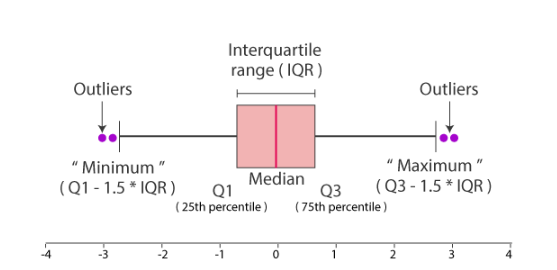

<b>Plotting a boxplot</b>

The inner box with the median in between, and the two whiskers can be seen in the chart below.

In [ ]:
plt.figure(figsize=(4,8))

sns.boxplot(y=sales_data['ItemCount'])

## 3.2 Bivariate analysis  <a id='p4.2' />
The bivariate distribution plots help us to study the relationship between two variables by analyzing the scatter plot and correlation matrix.

### 3.2.1 Scatter plots

Below code gives Scatter plots between all pairs of numerical variables as a single chart.

<mark style="background-color:#ADD8E6;">pairplot function from Seaborn package plots all possible pairs of numerical variables together in a single chart.</mark>

In [ ]:
import seaborn as sns
#selecting 5 columns for readability
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice']
sales_data_hist = sales_data[['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice']]

#Dropping NULLs for the chart
sales_data_hist=sales_data_hist.dropna()

sns.pairplot(sales_data_hist)

### 3.2.2 Joint plots
<b>Charts for selected pair of variables can be plotted using below code</b>

In [ ]:
sns.jointplot(x='StrengthFactor',y='ItemCount',data=sales_data_hist)

We often look out for scatter plots that follow a clear linear pattern with an either increasing or decreasing slope so that we can draw conclusions, but don’t notice these patterns in this particular dataset.

That said, there’s always room to derive other insights that might be useful by comparing the nature of the plots between the variables of interest.

### 3.2.3 The correlation matrix

<b>Correlation coefficients are used in statistics to measure how strong a relationship is between two variables.</b>

In [ ]:
corr = sales_data_hist.corr()
corr

In [ ]:
#plotting it as a heatmap
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True,xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='viridis')

Above you can see the correlation network of all the variables selected, correlation value lies between -1 to +1. Highly correlated variables will have correlation value close to +1 and less correlated variables will have correlation value close to -1.In this dataset, we don’t see any attributes to be correlated and the diagonal elements of the matrix value are always 1 as we are finding the correlation between the same columns.

## 3.3 Outlier Detection


Outlier is an observation that appears far away and diverges from an overall pattern in a sample.<br/><mark>Example: Census data might show a median monthly household income of INR 70,000 and a mean monthly household income of INR 80,000.
But one or two households might have an income of INR 200,000. These cases are identified as outliers</mark>

Outliers could be valid data points or could occur due to Data Entry Errors, Measurement Errors, Data Processing Errors, etc.<br/>Outliers must be removed or treated as they could adversely affect the analysis.<br/>


The box plot allows us to visually analyze the outliers in the dataset.

The key terminology to note here are as follows:
1. <b>Range</b>: The range of the data provides us with a measure of spread and is equal to a value between the smallest data point (min) and the largest one (Max).
2. <b>Interquartile range (IQR)</b>: the range of the middle 50% of the data.
 - IQR = Q3 - Q1, the difference between the third and first quartiles
 - The first quartile (Q1) is the value such that one quarter (25%) of the data points fall below it, or the median of the bottom half of the data
 - The third quartile is the value such that three quarters (75%) of the data points fall below it, or the median of the top half of the data.

The IQR can be used to detect outliers using the 1.5\*IQR criteria. Outliers are observations that fall below Q1 - 1.5\*IQR or above Q3 + 1.5\*IQR.

In [ ]:
#plotting a box plot
plt.figure(figsize=(4,8))
sns.boxplot(y=sales_data['ItemCount'])

<b>Let's look at each of the components for the above chart.</b>

<mark style="background-color:#ADD8E6;">We will use the 'quantile' method available for a dataframe to get the value at our selected quantile (0.5 is median)</mark>

In [ ]:
ItemCount_q1 = sales_data.quantile(0.25)['ItemCount']
ItemCount_median = sales_data.quantile(0.5)['ItemCount']
ItemCount_q3 = sales_data.quantile(0.75)['ItemCount']

print('Min:',sales_data['ItemCount'].min())
print('Q1:',ItemCount_q1)
print('Median:',ItemCount_median)
print('Q3:',ItemCount_q3)
print('Max:',sales_data['ItemCount'].max())

In [ ]:
# IQR
ItemCount_iqr = ItemCount_q3-ItemCount_q1
print(ItemCount_iqr)

In [ ]:
#Q1 - 1.5*IQR
lower_whisker = ItemCount_q1-1.5*ItemCount_iqr
print('Q1 - 1.5*IQR:',lower_whisker)

In [ ]:
#Q3 + 1.5*IQR
upper_whisker = ItemCount_q3+1.5*ItemCount_iqr
print('Q3 + 1.5*IQR:',upper_whisker)

Summarizing the above observations:
- Our data has a minimum value of 0, which is higher than the lower whisker value, and hence the lower whisker has been plotted at 0 instead
- The median (middle line in the box) is plotted at 32
- The lower and upper bound of the box in middle are plotted at 50 and 21
- The upper whisker has been plotted at 93.5
- Data above and below the upper and lower whiskers can be called outliers

<b>We will remove the outlier data points and redo the above exercise</b>

In [ ]:
#Removing the outliers
ItemCount_cleaned = sales_data[(sales_data['ItemCount'] >= lower_whisker) & (sales_data['ItemCount'] <= upper_whisker)][['ItemCount']]

Use the above data array 'ItemCount_cleaned' and plot a Boxplot.


In [ ]:
#Box plot code here
plt.figure(figsize=(4,8))
sns.boxplot(y=ItemCount_cleaned['ItemCount'])

Do you see any outliers now? Can you address the reason of still having the outliers?

Well, it's because after removing the outliers if we re-calculate the statistical values like Q1, Median, Q3 etc., they will change. Hence, the datapoints above `Q3+1.5*IQR` and below `Q1-1.5*IQR` will also change.

In [ ]:
ItemCount_cleaned_q1 = ItemCount_cleaned.quantile(0.25)['ItemCount']
ItemCount_cleaned_median = ItemCount_cleaned.quantile(0.5)['ItemCount']
ItemCount_cleaned_q3 = ItemCount_cleaned.quantile(0.75)['ItemCount']

print('Min:',ItemCount_cleaned['ItemCount'].min())
print('Q1:',ItemCount_cleaned_q1)
print('Median:',ItemCount_cleaned_median)
print('Q3:',ItemCount_cleaned_q3)
print('Max:',ItemCount_cleaned['ItemCount'].max())

# 4. Hands-On Practice Exercise <a id='p4' />

You can use ChatGPT to answer these questions.

We will be using the `tips` dataset from seaborn library for **Task 1** to **Task 4**.


In [ ]:
# load the dataset
tips = sns.load_dataset('tips')
tips.head(10)

**Task 1: Create a scatter plot of "total_bill" vs "tip"**

In [ ]:
# Task 1


**Task 2: Create a box plot of total bills for smokers vs non-smokers**

In [ ]:
# Task 2


**Task 3: Create a bar plot to show the average total bill for each day of the week.**

In [ ]:
# Task 3

**Task 4: Create a count plot to visualize the distribution of customers by gender.**

In [ ]:
# Task 4


We will be using the `titanic` dataset from seaborn library for **Task 5** to **Task 8**.

In [ ]:
# Load the "titanic" dataset
titanic = sns.load_dataset('titanic')
titanic.head(10)

**Task 5: Create a pie chart to visualize the distribution of passengers based on their survival status.**

In [ ]:
# Task 5


**Task 6: Create a histogram for passenger age distribution.**

In [ ]:
# Task 6


**Task 7: Create a bar chart to show the count of male and female passengers.**

In [ ]:
# Task 7


**Task 8: Create a box plot to compare the age distribution of survivors and non-survivors.**

In [ ]:
# Task 8


##### The End
[Back to Content](#tc)

Copyright © 2023 by Boston Consulting Group. All rights reserved.